In [2]:
import pandas as pd

In [ ]:
48	WAIST
50	HEIGHT
102	PULSE
4079	DBP
4080	SBP
20116	SMOKE
20117	DRINK
21001	BMI
21002	WEIGHT
30000	WBC
30010	RBC
30020	Hb
30080	PLT
30120	LYMPH
30130	MONO
30140	NEUT
30150	EOS
30620	ALT
30650	AST
30670	BUN
30690	CHOL
30700	CRE
30730	GGT
30740	GLUC
30760	HDL
30780	LDL
30870	TRIG
30880	UA


In [3]:
# Step1: get the effective sample size for three cohorts

ukb_eur_pheno = pd.read_csv('../../../PRS_benchmark/data/phenotype/UKB/trait_ukb_white_british.txt', sep='\t')
cols = ["FID", "IID"] + [col for col in ukb_eur_pheno.columns if col.endswith('_raw')]
ukb_eur_pheno = ukb_eur_pheno[cols]
# remove '_raw' suffix from column names
ukb_eur_pheno.columns = [col.replace('_raw', '') for col in ukb_eur_pheno.columns]
ukb_pheno_dict = {
    'p48': 'WAIST',
    'p50': 'HEIGHT',
    'p102': 'PULSE',
    'p4079': 'DBP',
    'p4080': 'SBP',
    'p20116': 'SMOKE',
    'p20117': 'DRINK',
    'p21001': 'BMI',
    'p21002': 'WEIGHT',
    'p30000': 'WBC',
    'p30010': 'RBC',
    'p30020': 'Hb',
    'p30080': 'PLT',
    'p30120': 'LYMPH',
    'p30130': 'MONO',
    'p30140': 'NEUT',
    'p30150': 'EOS',
    'p30620': 'ALT',
    'p30650': 'AST',
    'p30670': 'BUN',
    'p30690': 'CHOL',
    'p30700': 'CRE',
    'p30730': 'GGT',
    'p30740': 'GLUC',
    'p30760': 'HDL',
    'p30780': 'LDL',
    'p30870': 'TRIG',
    'p30880': 'UA'
}
ukb_eur_pheno.rename(columns=ukb_pheno_dict, inplace=True)
display(ukb_eur_pheno)
# description = ukb_eur_pheno.describe().T
# description.to_csv('../../data/pheno/ukb_eur_pheno_description.tsv', sep='\t', index=True)

,FID,IID,WAIST,HEIGHT,PULSE,DBP,SBP,SMOKE,DRINK,BMI,...,AST,BUN,CHOL,CRE,GGT,GLUC,HDL,LDL,TRIG,UA
0,1000070,1000070,90.0,179.0,93.0,98.0,154.0,1.0,2.0,26.8406,...,30.7,4.23,4.775,65.6,25.8,NaN,NaN,2.970,1.131,362.8
1,1000308,1000308,86.0,183.0,69.0,83.0,145.0,0.0,2.0,25.3815,...,19.8,4.77,3.816,93.9,13.3,3.813,0.982,2.340,1.016,366.6
2,1000353,1000353,78.0,177.0,NaN,NaN,NaN,1.0,2.0,21.1944,...,22.9,6.28,6.533,88.3,18.5,5.989,1.495,4.357,1.997,395.0
3,1000424,1000424,72.0,167.0,53.0,60.0,115.0,0.0,2.0,23.2350,...,29.3,6.71,4.169,83.5,24.7,3.442,1.685,2.171,0.742,246.0
4,1000485,1000485,89.0,175.0,83.0,85.0,120.0,0.0,2.0,23.9020,...,26.1,5.29,6.603,84.1,20.2,5.128,1.400,4.428,0.865,318.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336917,6018286,6018286,91.0,168.0,68.0,84.0,140.0,0.0,2.0,26.2188,...,24.2,4.64,5.764,76.5,24.8,5.019,1.212,3.866,1.412,395.9
336918,6019735,6019735,79.0,152.0,65.0,66.0,129.0,0.0,0.0,23.8054,...,28.5,5.86,7.252,63.7,13.1,4.572,2.070,4.316,1.067,245.8
336919,6020195,6020195,107.0,179.0,75.0,92.0,136.0,0.0,2.0,28.1826,...,40.6,8.59,7.090,99.4,90.5,4.388,1.285,4.960,2.343,484.0
336920,6020464,6020464,95.0,174.0,68.0,77.0,169.0,1.0,2.0,26.9190,...,25.1,7.56,6.044,71.7,34.4,5.218,1.352,4.034,1.877,412.5


In [4]:
# Step1: get the effective sample size for three cohorts

ukb_eas_pheno = pd.read_csv('../../../PRS_benchmark/data/phenotype/UKB/trait_ukb_chinese.txt', sep='\t')
cols = ["FID", "IID"] + [col for col in ukb_eas_pheno.columns if col.endswith('raw')]
ukb_eas_pheno = ukb_eas_pheno[cols]
# remove '_raw' suffix from column names
ukb_eas_pheno.columns = [col.replace('_raw', '') for col in ukb_eas_pheno.columns]
ukb_eas_pheno.rename(columns=ukb_pheno_dict, inplace=True)
display(ukb_eas_pheno)
# description = ukb_eas_pheno.describe().T
# description.to_csv('../../data/pheno/ukb_eas_pheno_description.tsv', sep='\t', index=True)

,FID,IID,WAIST,HEIGHT,PULSE,DBP,SBP,SMOKE,DRINK,BMI,...,AST,BUN,CHOL,CRE,GGT,GLUC,HDL,LDL,TRIG,UA
0,1005588,1005588,75.0,164.0,77.0,83.0,123.0,0.0,2.0,20.7094,...,22.7,6.83,7.032,71.6,17.5,4.692,1.263,4.392,4.121,359.1
1,1031732,1031732,68.0,157.0,63.0,61.0,109.0,0.0,2.0,19.6357,...,31.5,5.36,6.031,65.3,28.6,NaN,NaN,3.935,1.674,260.7
2,1038880,1038880,68.0,157.0,57.0,99.0,156.0,0.0,2.0,19.7168,...,17.9,4.97,4.859,70.8,17.5,4.297,1.296,3.084,1.014,275.5
3,1058549,1058549,96.0,158.0,72.0,95.0,163.0,0.0,0.0,25.8372,...,23.1,3.75,6.772,47.9,14.9,5.774,1.413,4.333,2.635,310.0
4,1078009,1078009,78.0,155.0,76.0,91.0,137.0,0.0,2.0,22.0604,...,21.2,6.03,5.271,56.9,12.8,5.053,1.493,3.136,1.606,190.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,5931740,5931740,98.0,164.0,68.0,83.0,129.0,0.0,2.0,33.1648,...,21.8,5.01,4.519,51.7,16.0,4.228,1.338,2.680,1.246,227.8
1494,5967779,5967779,67.0,157.0,75.0,90.0,156.0,0.0,0.0,19.3517,...,38.0,6.07,4.683,55.3,42.4,5.197,1.442,2.722,1.388,317.2
1495,5974886,5974886,86.0,164.0,64.0,80.0,111.0,0.0,2.0,23.2748,...,16.9,4.88,5.331,56.6,35.5,5.444,1.182,3.558,1.139,307.5
1496,6001460,6001460,86.0,174.0,NaN,NaN,NaN,0.0,2.0,24.5079,...,21.7,4.72,5.261,88.6,46.8,7.067,1.593,3.144,2.164,414.2


In [5]:
cas_pheno = pd.read_csv('../../../PRS_benchmark/data/phenotype/CAS/CAS_merged_pheno.txt', sep='\t')
display(cas_pheno.columns)
cas_pheno_dict = {
    'height': 'HEIGHT',
    'waist': 'WAIST',
    'pulse': 'PULSE',
    'dbp': 'DBP',
    'sbp': 'SBP',
    'smoke': 'SMOKE',
    'drink': 'DRINK',
    'bmi': 'BMI',
    'weight': 'WEIGHT',
    'wbc': 'WBC',
    'rbc': 'RBC',
    'hb': 'Hb',
    'plt': 'PLT',
    'lymph': 'LYMPH',
    'mono': 'MONO',
    'neut': 'NEUT',
    'eos': 'EOS',
    'alt': 'ALT',
    'ast': 'AST',
    'bun': 'BUN',
    'cholesterol': 'CHOL',
    'creatinine': 'CRE',
    'ggt': 'GGT',
    'glucose': 'GLUC',
    'hdl': 'HDL',
    'ldl': 'LDL',
    'triglycerides': 'TRIG',
    'ua': 'UA'
}
cas_pheno.rename(columns=cas_pheno_dict, inplace=True)
display(cas_pheno)
description = cas_pheno.describe().T
description.to_csv('../../../PRS_benchmark/data/phenotype/CAS/cas_pheno_description.tsv', sep='\t', index=True)

Index(['FID', 'IID', 'age', 'alt', 'ast', 'bmi', 'bun', 'cholesterol',
       'creatinine', 'dbp', 'drink', 'eos', 'ggt', 'glucose', 'hb', 'hdl',
       'height', 'ldl', 'lymph', 'mono', 'neut', 'plt', 'pulse', 'rbc', 'sbp',
       'sex', 'smoke', 'triglycerides', 'ua', 'waist', 'wbc', 'weight'],
      dtype='object')

,FID,IID,age,ALT,AST,BMI,BUN,CHOL,CRE,DBP,...,PULSE,RBC,SBP,sex,SMOKE,TRIG,UA,WAIST,WBC,WEIGHT
0,20091201,20091201,33,11.0,14.0,20.312500,3.36,5.20,65.0,78.0,...,72.0,4.25,105.0,female,1.0,0.67,271.0,78.0,5.39,52.0
1,20091202,20091202,35,13.0,19.0,18.902038,5.05,4.25,56.0,66.0,...,69.0,4.62,94.0,female,1.0,0.61,208.0,72.0,5.09,46.0
2,20091203,20091203,32,20.0,14.0,22.093170,6.40,3.67,73.0,NaN,...,NaN,5.46,NaN,male,1.0,0.98,480.0,77.0,6.07,70.0
3,20091204,20091204,31,103.0,46.0,33.251550,3.60,5.31,69.0,NaN,...,NaN,5.34,NaN,male,1.0,2.45,489.0,107.0,6.87,103.0
4,20091205,20091205,39,14.0,18.0,NaN,NaN,3.76,83.0,86.0,...,99.0,5.18,133.0,male,1.0,0.54,323.0,NaN,5.80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,ZKY1224,ZKY1224,37,NaN,NaN,NaN,NaN,5.20,56.0,70.0,...,NaN,NaN,109.0,female,1.0,1.06,220.0,NaN,NaN,NaN
2456,ZKY1225,ZKY1225,30,NaN,NaN,NaN,NaN,4.50,55.0,61.0,...,NaN,NaN,107.0,female,1.0,0.56,359.0,NaN,NaN,NaN
2457,ZKY1226,ZKY1226,38,NaN,NaN,NaN,NaN,4.87,101.0,84.0,...,NaN,NaN,125.0,female,1.0,1.30,181.0,NaN,NaN,NaN
2458,ZKY1227,ZKY1227,33,NaN,NaN,NaN,NaN,4.54,67.0,59.0,...,NaN,NaN,94.0,female,1.0,0.67,288.0,NaN,NaN,NaN


,trait_name,short_name,category,sample_size,mean_value,cohort
0,Alanine aminotransferase,ALT,Blood biochemistry,321997,23.520192,UKB_EUR
1,Aspartate aminotransferase,AST,Blood biochemistry,320973,26.190433,UKB_EUR
2,Body mass index (BMI),BMI,Body size measures,335906,27.395302,UKB_EUR
3,Urea,BUN,Blood biochemistry,321917,5.436034,UKB_EUR
4,Cholesterol,CHOL,Blood biochemistry,322124,5.714180,UKB_EUR
...,...,...,...,...,...,...
73,Triglycerides,TRIG,Blood biochemistry,2373,1.383017,CAS
74,Urate,UA,Blood biochemistry,2399,351.024806,CAS
75,Waist circumference,WAIST,Body size measures,1762,82.285471,CAS
76,White blood cell (leukocyte) count,WBC,Blood count,1913,6.167585,CAS


C:\Users\nancyli\AppData\Local\Temp\ipykernel_14136\184461112.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_heatmap = data.pivot("short_name", "cohort", "z_score_mean")


,p_value_1_2,p_value_1_3,p_value_2_3,pvalue,statistic,t_statistic_1_2,t_statistic_1_3,t_statistic_2_3
ALT,2.119716e-01,1.147781e-03,5.297860e-04,7.428025e-14,3.023374e+01,1.248720,-3.256468,-3.469260
LDL,1.060962e-12,1.262753e-215,2.253670e-53,8.977565e-223,5.120861e+02,7.187062,34.826018,15.690651
TRIG,8.796861e-01,1.042819e-73,5.516120e-26,1.168012e-68,1.564956e+02,-0.151394,18.802507,10.654112
GLUC,7.289108e-01,2.668684e-04,7.906016e-02,2.026683e-02,3.898820e+00,0.346649,3.650784,1.756896
GGT,8.655226e-07,1.214132e-58,1.126384e-03,1.667095e-22,5.015352e+01,4.941674,16.729207,3.261316
HDL,2.442149e-01,2.002817e-19,6.392946e-09,1.013819e-13,2.992287e+01,-1.165041,9.090133,5.828017
UA,1.977695e-01,1.656828e-91,1.905433e-41,1.309295e-138,3.177971e+02,-1.288530,-21.182611,-13.665641
CHOL,5.479141e-10,5.932448e-138,3.298634e-27,7.042292e-124,2.838155e+02,6.247639,26.709803,10.915185
BUN,1.194419e-13,7.670275e-153,9.206901e-29,1.156673e-132,3.040796e+02,7.490500,28.877681,11.253551
AST,9.298146e-01,4.455466e-42,1.019189e-21,6.094046e-102,2.332240e+02,0.088094,13.949890,9.646285


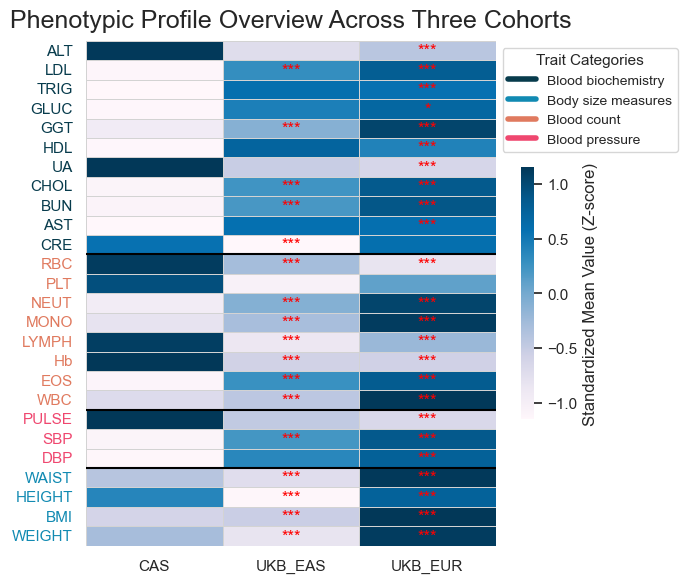

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

data = pd.read_excel("../../../PRS_benchmark/data/phenotype/mean_values_data.xlsx")
display(data)
data["z_score_mean"] = data.groupby("trait_name")["mean_value"].transform(lambda x: (x - x.mean()) / x.std())
df_heatmap = data.pivot("short_name", "cohort", "z_score_mean")
# df_size = data.pivot("short_name", "cohort", "sample_size")
df_category_map = data[["short_name", "category"]].drop_duplicates().sort_values(by="category").set_index("short_name")
df_category_map.to_csv("category_map.tsv", sep='\t', index=True)
df_heatmap = df_heatmap.loc[df_category_map.index]
# df_size = df_size.loc[df_category_map.index]

# do the one-way ANOVA test
from scipy.stats import f_oneway
def anova_test(trait):
    group1 = ukb_eur_pheno[trait].dropna()
    # change trait column to float
    group1 = group1.astype(float)
    # Ensure the group1 is a numpy array for compatibility with f_oneway
    if isinstance(group1, pd.Series):
        group1 = group1.to_numpy()
    group2 = ukb_eas_pheno[trait].dropna()
    # change trait column to float
    group2 = group2.astype(float)
    # Ensure the group2 is a numpy array for compatibility with f_oneway
    if isinstance(group2, pd.Series):
        group2 = group2.to_numpy()
    group3 = cas_pheno[trait].dropna()
    # change trait column to float
    group3 = group3.astype(float)
    # Ensure the group3 is a numpy array for compatibility with f_oneway
    if isinstance(group3, pd.Series):
        group3 = group3.to_numpy()
    # Only run ANOVA if all groups have at least 2 values
    f_statistic, p_value = f_oneway(group1, group2, group3)
    return pd.Series({'statistic': f_statistic, 'pvalue': p_value})
anova_results = {}
for trait in df_heatmap.index:
    anova_results[trait] = anova_test(trait)
    if anova_results[trait]['pvalue'] < 0.05:
        # 进行两组之间的T检验
        from scipy.stats import ttest_ind
        group1 = ukb_eur_pheno[trait].dropna().astype(float).to_numpy()
        group2 = ukb_eas_pheno[trait].dropna().astype(float).to_numpy()
        group3 = cas_pheno[trait].dropna().astype(float).to_numpy()
        t_statistic_1_2, p_value_1_2 = ttest_ind(group1, group2, equal_var=False)
        t_statistic_1_3, p_value_1_3 = ttest_ind(group1, group3, equal_var=False)
        t_statistic_2_3, p_value_2_3 = ttest_ind(group2, group3, equal_var=False)
        anova_results[trait]['t_statistic_1_2'] = t_statistic_1_2
        anova_results[trait]['p_value_1_2'] = p_value_1_2
        anova_results[trait]['t_statistic_1_3'] = t_statistic_1_3
        anova_results[trait]['p_value_1_3'] = p_value_1_3
        anova_results[trait]['t_statistic_2_3'] = t_statistic_2_3
        anova_results[trait]['p_value_2_3'] = p_value_2_3
# 将ANOVA结果转换为DataFrame
anova_results_df = pd.DataFrame(anova_results).T
# 将ANOVA结果添加到df_heatmap中
display(anova_results_df)
# 根据p值进行显著性标记
anova_results_df['significance'] = np.where(anova_results_df['pvalue'] < 0.001, '***',
                                            np.where(anova_results_df['pvalue'] < 0.01, '**',
                                                     np.where(anova_results_df['pvalue'] < 0.05, '*', '')))

sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(8, 6))
cbar_kws = {"label": "Standardized Mean Value (Z-score)", "shrink": 0.5}
sns.heatmap(df_heatmap, ax=ax, cmap="PuBu", center=0, annot=False, linewidths=0.5, cbar_kws=cbar_kws, linecolor='lightgray')
# set sns.heatmap legend position

# 把anova_results_df的显著性标记画到热图上
for i, trait in enumerate(df_heatmap.index):
    group_1_2_pvalue = anova_results_df.loc[trait, 'p_value_1_2']
    group_1_3_pvalue = anova_results_df.loc[trait, 'p_value_1_3']
    group_2_3_pvalue = anova_results_df.loc[trait, 'p_value_2_3']
    if group_1_2_pvalue < 0.05:
        ax.text(1.5, i + 0.5, anova_results_df.loc[trait, 'significance'], ha='center', va='center', color='red', fontsize=12)
    if group_1_3_pvalue < 0.05:
        ax.text(2.5, i + 0.5, anova_results_df.loc[trait, 'significance'], ha='center', va='center', color='red', fontsize=12)
    # if group_2_3_pvalue < 0.05:
    #     ax.text(2.5, i + 0.5, anova_results_df.loc[trait, 'significance'], ha='center', va='center', color='black', fontsize=12)

# --- 美化与添加分组信息 ---
# 设置X轴和Y轴标签
ax.set_xticklabels(df_heatmap.columns, rotation=0, fontsize=18)
ax.set_yticklabels(df_heatmap.index, rotation=0, fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Phenotypic Profile Overview Across Three Cohorts', fontsize=18, pad=10)

# 添加性状分类的分组标签
category_boundaries = df_category_map['category'].ne(df_category_map['category'].shift()).cumsum()
category_positions = {}
for i, (name, group) in enumerate(df_category_map.groupby(category_boundaries)):
    start_idx = group.index[0]
    end_idx = group.index[-1]
    y_pos = (df_heatmap.index.get_loc(start_idx) + df_heatmap.index.get_loc(end_idx) + 1) / 2
    category_positions[group['category'].iloc[0]] = y_pos
    # 在分组之间画线
    if i > 0:
        ax.axhline(y=df_heatmap.index.get_loc(start_idx), color='black', linewidth=1.5)

# 根据分组标签改变Y轴标签的颜色
for label in ax.get_yticklabels():
    trait_name = label.get_text()
    # 根据类别设置标签颜色
    category = df_category_map.loc[trait_name, 'category']
    label.set_color('#073B4C' if category == 'Blood biochemistry' else '#118AB2' if category == 'Body size measures' else '#E07A5F' if category == "Blood count" else "#EF476F" if category == "Blood pressure" else "#06D6A0")

# --- 添加图例 ---
legend_elements = [
    Line2D([0], [0], color='#073B4C', lw=4, label='Blood biochemistry'),
    Line2D([0], [0], color='#118AB2', lw=4, label='Body size measures'),
    Line2D([0], [0], color='#E07A5F', lw=4, label='Blood count'),
    Line2D([0], [0], color='#EF476F', lw=4, label='Blood pressure'),
]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, title='Trait Categories', title_fontsize='11')

# --- 最终调整 ---
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(top=False, bottom=False, left=False, right=False) # 隐藏刻度线
plt.tight_layout(rect=[0, 0, 0.85, 1]) # 为图例和分类标签留出空间
plt.show()


In [2]:
import pandas as pd
import re

eur_h2 = pd.read_csv('../../../PRS_benchmark/data/result/h2/eur_h2.tsv', sep='\t')
eas_h2 = pd.read_csv('../../../PRS_benchmark/data/result/h2/eas_h2.tsv', sep='\t')
eas_2_h2 = pd.read_csv('../../../PRS_benchmark/data/result/h2/eas_2_h2.tsv', sep='\t')
eas_3_h2 = pd.read_csv('../../../PRS_benchmark/data/result/h2/bbj_h2_results.tsv', sep='\t')
# display(eur_h2)
# display(eas_h2)
# display(eas_2_h2)

trait_dict = {
    'p48': 'waist',
    'p50': 'height',
    'p102': 'pulse',
    'p4079': 'dbp',
    'p4080': 'sbp',
    'p20116': 'smoke',
    'p20117': 'drink',
    'p21001': 'bmi',
    'p21002': 'weight',
    'p30000': 'wbc',
    'p30010': 'rbc',
    'p30020':'hb',
    'p30080': 'plt',
    'p30120': 'lymph',
    'p30130': 'mono',
    'p30140': 'neut',
    'p30150': 'eos',
    'p30620': 'alt',
    'p30650': 'ast',
    'p30670': 'bun',
    'p30690': 'cholesterol',
    'p30700': 'creatinine',
    'p30730': 'ggt',
    'p30740': 'glucose',
    'p30760': 'hdl',
    'p30780': 'ldl',
    'p30870': 'triglycerides',
    'p30880': 'ua'
}

# check the filename in eur_h2 and eas_h2
eur_h2["trait"] = eur_h2["filename"].apply(lambda x: trait_dict.get(x.split('_')[0], 'unknown'))
eas_2_h2["trait"] = eas_2_h2["filename"].apply(lambda x: trait_dict.get(x.split('_')[0], 'unknown'))
eas_h2["trait"] = eas_h2["filename"].apply(lambda x: x.split('_')[0])
df = pd.merge(eur_h2[['trait', 'h2', 'se']], eas_h2[['trait', 'h2', 'se']], on='trait', how="outer", suffixes=('_eur', '_eas'))
df = pd.merge(df, eas_2_h2[['trait', 'h2', 'se']], on='trait', how="outer", suffixes=('', '_eas_2'))
df = pd.merge(df, eas_3_h2[['trait', 'h2', 'se']], on='trait', how="outer", suffixes=('', '_bbj'))
df.rename(columns={'h2': 'h2_eas_2', 'se': 'se_eas_2'}, inplace=True)
# remove the line that has 'weight' in trait
df = df[~df['trait'].str.contains('weight', case=False)]
display(df)

,trait,h2_eur,se_eur,h2_eas,se_eas,h2_eas_2,se_eas_2,h2_bbj,se_bbj
0,alt,0.1227,0.0086,NaN,NaN,0.9547,0.6617,0.0280,0.0065
1,ast,0.1343,0.0092,NaN,NaN,NaN,NaN,0.0407,0.0071
2,bmi,0.2500,0.0081,0.0492,0.5087,0.3509,0.6416,0.1013,0.0087
3,bun,0.1198,0.0081,0.2258,0.5312,NaN,NaN,0.0400,0.0084
4,cholesterol,0.1208,0.0126,NaN,NaN,0.7632,0.6553,0.0376,0.0098
5,creatinine,0.2049,0.0108,0.0587,0.5268,0.3173,0.6703,NaN,NaN
6,dbp,0.1432,0.0072,0.8601,0.4357,0.0027,0.6454,0.0202,0.0064
7,drink,0.0190,0.0032,0.3247,0.5243,0.2625,0.6032,NaN,NaN
8,eos,0.2066,0.0126,0.1869,0.6176,0.9982,0.6182,0.0381,0.0105
9,ggt,0.1878,0.0111,NaN,NaN,1.2953,0.5821,0.0602,0.0105


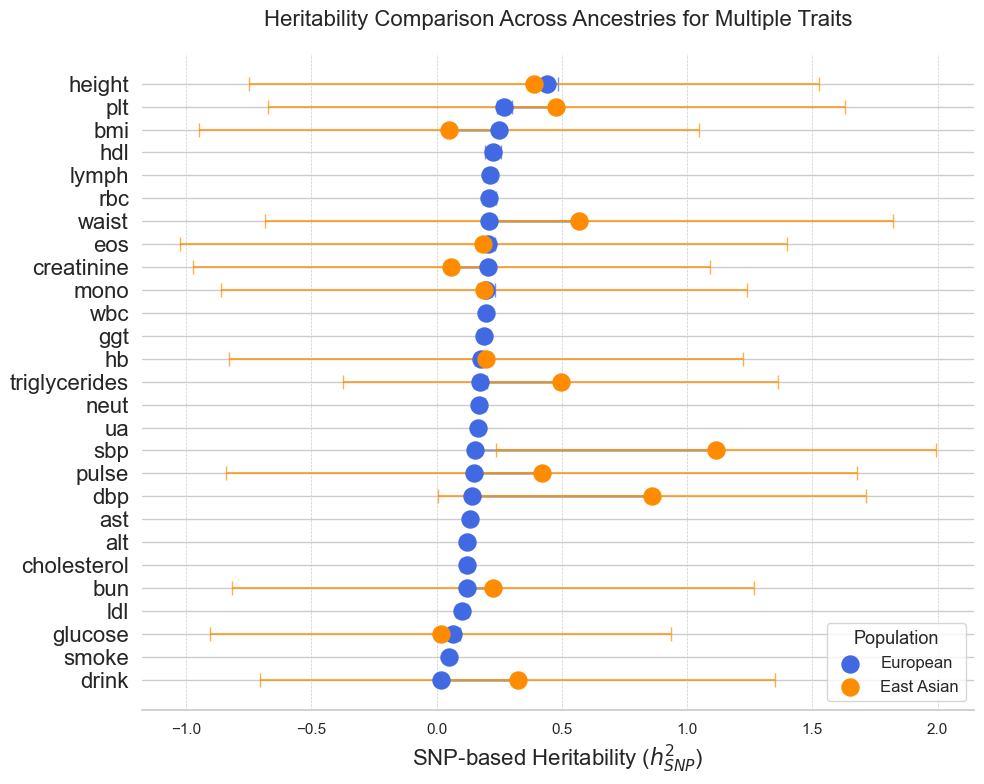

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================================
# 1. 模拟生成数据
# 假设您有这样一个DataFrame，包含了性状、人群、遗传力(h2)和标准误(se)
# 在实际应用中，您将加载自己的真实数据
# ==============================================================================

# 计算差值和95%置信区间
df['diff'] = abs(df['h2_eur'] - df['h2_eas'])
df['eur_ci_low'] = df['h2_eur'] - 1.96 * df['se_eur']
df['eur_ci_high'] = df['h2_eur'] + 1.96 * df['se_eur']
df['eas_ci_low'] = df['h2_eas'] - 1.96 * df['se_eas']
df['eas_ci_high'] = df['h2_eas'] + 1.96 * df['se_eas']

# 关键步骤：根据差值对DataFrame进行排序
df_sorted = df.sort_values('h2_eur', ascending=True).reset_index(drop=True)


# ==============================================================================
# 2. 绘制哑铃图
# ==============================================================================
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制连接两个点的线段 (哑铃的“杆”)
ax.hlines(y=df_sorted.index, xmin=df_sorted['h2_eur'], xmax=df_sorted['h2_eas'],
color='gray', alpha=0.6, linewidth=2, zorder=1)

# 绘制误差棒
ax.errorbar(df_sorted['h2_eur'], df_sorted.index,
xerr=(df_sorted['h2_eur']-df_sorted['eur_ci_low'], df_sorted['eur_ci_high']-df_sorted['h2_eur']),
fmt='none', color='royalblue', capsize=5, alpha=0.7)
ax.errorbar(df_sorted['h2_eas'], df_sorted.index,
xerr=(df_sorted['h2_eas']-df_sorted['eas_ci_low'], df_sorted['eas_ci_high']-df_sorted['h2_eas']),
fmt='none', color='darkorange', capsize=5, alpha=0.7)

# 绘制两个点 (哑铃的“头”)
ax.scatter(df_sorted['h2_eur'], df_sorted.index, color='royalblue', s=150, zorder=2, label='European')
ax.scatter(df_sorted['h2_eas'], df_sorted.index, color='darkorange', s=150, zorder=2, label='East Asian')

# 美化图表
ax.set_yticks(df_sorted.index)
ax.set_yticklabels(df_sorted['trait'], fontsize=16)
ax.set_xlabel('SNP-based Heritability ($h^2_{SNP}$)', fontsize=16)
ax.set_ylabel('')
ax.set_title('Heritability Comparison Across Ancestries for Multiple Traits', fontsize=16, pad=20)
ax.legend(title='Population', fontsize=12, title_fontsize=13, loc='lower right')
ax.grid(True, which='major', axis='x', linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

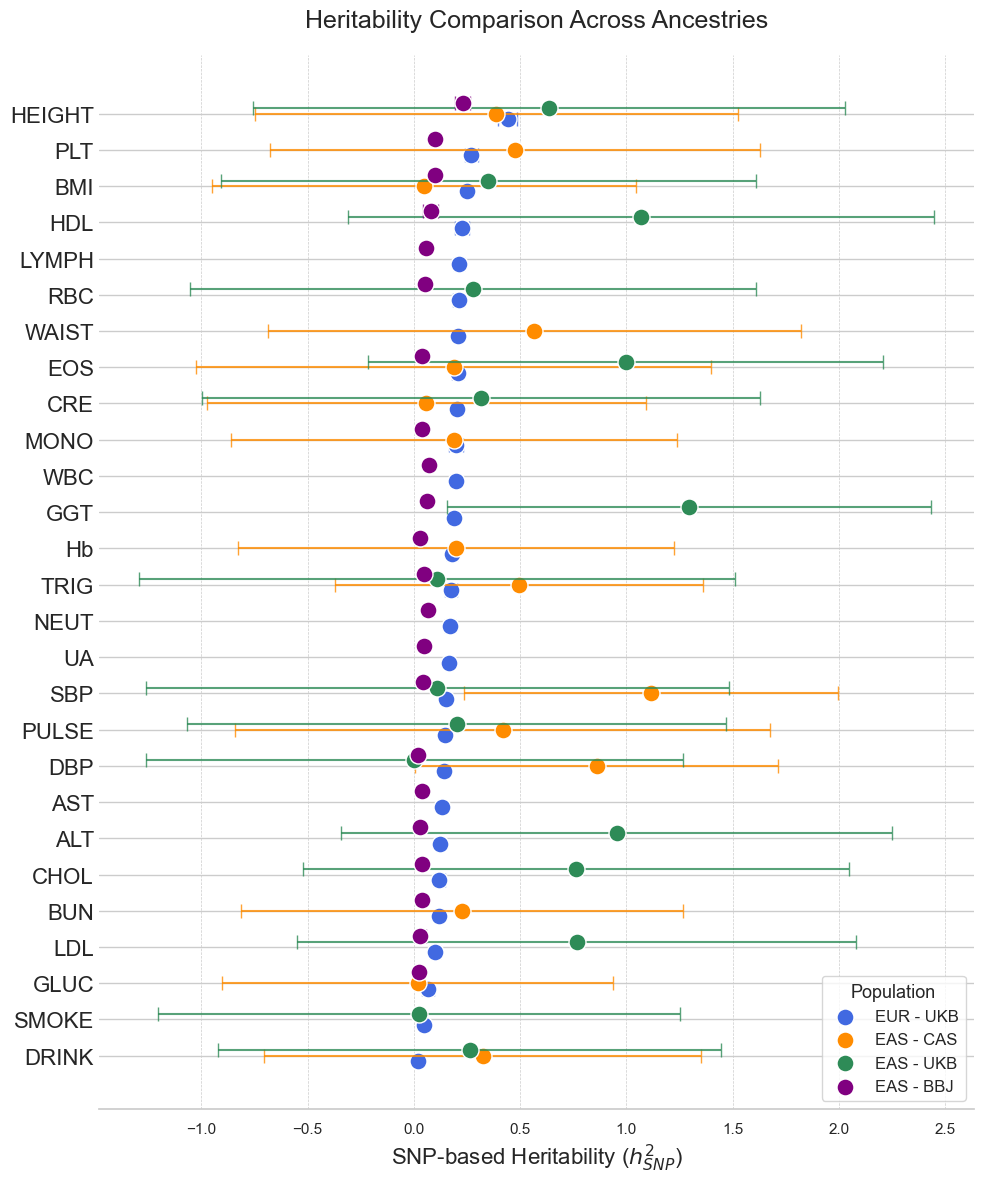

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ukb_pheno_dict = {
    'waist': 'WAIST',
    'height': 'HEIGHT',
    'pulse': 'PULSE',
    'dbp': 'DBP',
    'sbp': 'SBP',
    'smoke': 'SMOKE',
    'drink': 'DRINK',
    'bmi': 'BMI',
    # 'p21002': 'WEIGHT',
    'wbc': 'WBC',
    'rbc': 'RBC',
    'hb': 'Hb',
    'plt': 'PLT',
    'lymph': 'LYMPH',
    'mono': 'MONO',
    'neut': 'NEUT',
    'eos': 'EOS',
    'alt': 'ALT',
    'ast': 'AST',
    'bun': 'BUN',
    'cholesterol': 'CHOL',
    'creatinine': 'CRE',
    'ggt': 'GGT',
    'glucose': 'GLUC',
    'hdl': 'HDL',
    'ldl': 'LDL',
    'triglycerides': 'TRIG',
    'ua': 'UA'
}

def plot_heritability_comparison(df):
    """
    绘制三个人群遗传力的比较图（森林图样式）。

    参数:
    df (pd.DataFrame): 包含遗传力数据的DataFrame。
                       需要包含以下列: 'trait', 
                                     'h2_eur', 'se_eur',
                                     'h2_eas', 'se_eas',
                                     'h2_afr', 'se_afr'
    """
    # --- 数据准备和计算 ---
    # 计算95%置信区间
    df['eur_ci_low'] = df['h2_eur'] - 1.96 * df['se_eur']
    df['eur_ci_high'] = df['h2_eur'] + 1.96 * df['se_eur']
    df['eas_ci_low'] = df['h2_eas'] - 1.96 * df['se_eas']
    df['eas_ci_high'] = df['h2_eas'] + 1.96 * df['se_eas']
    df['eas_2_ci_low'] = df['h2_eas_2'] - 1.96 * df['se_eas_2']
    df['eas_2_ci_high'] = df['h2_eas_2'] + 1.96 * df['se_eas_2']
    df['bbj_ci_low'] = df['h2_bbj'] - 1.96 * df['se_bbj']
    df['bbj_ci_high'] = df['h2_bbj'] + 1.96 * df['se_bbj']

    # 关键步骤：根据三组遗传力的平均值对DataFrame进行排序
    df['h2_mean'] = df[['h2_eur', 'h2_eas', 'h2_eas_2', 'h2_bbj']].mean(axis=1)
    df_sorted = df.sort_values('h2_eur', ascending=True).reset_index(drop=True)

    # --- 开始绘图 ---
    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 12))

    # 为每个点定义一个小的垂直偏移量，以避免重叠
    offsets = {'eur': -0.15, 'eas': 0, 'eas_2': 0.15, 'bbj': 0.3}
    colors = {'eur': 'royalblue', 'eas': 'darkorange', 'eas_2': 'seagreen', 'bbj': 'purple'}
    labels = {'eur': 'EUR - UKB', 'eas': 'EAS - CAS', 'eas_2': 'EAS - UKB', 'bbj': 'EAS - BBJ'}

    # 绘制误差棒和散点
    for pop in ['eur', 'eas', 'eas_2', 'bbj']:
        y_pos = df_sorted.index + offsets[pop]
        ax.errorbar(df_sorted[f'h2_{pop}'], y_pos,
                    xerr=(df_sorted[f'h2_{pop}'] - df_sorted[f'{pop}_ci_low'], 
                          df_sorted[f'{pop}_ci_high'] - df_sorted[f'h2_{pop}']),
                    fmt='none', color=colors[pop], capsize=5, alpha=0.8,
                    linewidth=1.5)
        
        ax.scatter(df_sorted[f'h2_{pop}'], y_pos, 
                   color=colors[pop], s=150, zorder=2, 
                   label=labels[pop], edgecolors='white', linewidth=1)

    # --- 美化图表 ---
    ax.set_yticks(df_sorted.index)
    # change y-tick labels to trait names in ukb_pheno_dict
    ax.set_yticks(df_sorted.index)
    ax.set_yticklabels([ukb_pheno_dict.get(trait, trait) for trait in df_sorted['trait']], fontsize=16)
    # ax.set_yticklabels(df_sorted['trait'], fontsize=16)
    ax.set_xlabel('SNP-based Heritability ($h^2_{SNP}$)', fontsize=16)
    ax.set_ylabel('')
    ax.set_title('Heritability Comparison Across Ancestries', fontsize=18, pad=20)
    
    # 创建图例
    # 为了避免图例中出现重复项，我们只为第一个循环中的标签创建图例
    handles, labels_map = ax.get_legend_handles_labels()
    # 根据标签顺序创建一个有序的图例
    by_label = dict(sorted(zip(labels_map, handles), key=lambda x: list(labels.values()).index(x[0])))
    ax.legend(by_label.values(), by_label.keys(), title='Population', fontsize=12, title_fontsize=13, loc='lower right')
    
    ax.grid(True, which='major', axis='x', linestyle='--', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='y', length=0)

    plt.tight_layout()
    # 您可以取消下面一行的注释，将图片保存到本地
    # plt.savefig("heritability_comparison_3_populations.png")
    plt.show()

# 调用函数进行绘图
plot_heritability_comparison(df)